# AutoEncoder For Handwritten Arabic Images

### Objective

Storing hand-drawn digit using as little memory as possible and Recognize users handwriting using minimum amount of data  Using a dataset of hand drawn Arabic digits, you will train an autoencoder to encode and decode these images.

In [42]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import SGD, Adam, RMSprop


import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


In [13]:
df = pd.read_csv('csvTrainImages 60k x 784.csv') # the trainset

In [14]:
# Convert the dataframe to a numpy array
data_array = df.values

# Print the shape of the data array
print("Shape of the data:", data_array.shape)

Shape of the data: (59999, 784)


In [15]:
# Normalize the data by dividing by 255
data_array = data_array / 255.0

In [17]:
# Reshape the data into 28x28 images (rows, height, width)
reshaped_data = data_array.reshape(-1, 28, 28)
reshaped_data.shape

(59999, 28, 28)

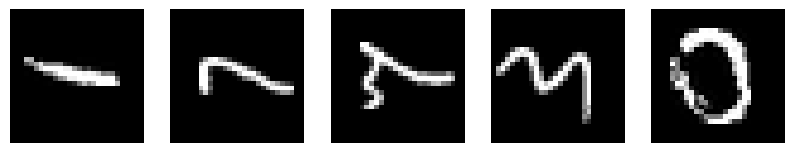

In [18]:
# Plot the first 5 images using matplotlib
plt.figure(figsize=(10, 2))

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(reshaped_data[i], cmap='gray')
    plt.axis('off')  # Hide axis for better visualization

plt.show()

In [19]:
# Reshape each image back to 784 (for neural network input)
reshaped_back_to_784 = reshaped_data.reshape(-1, 784)

# Print the shape to confirm the reshaping
print("Shape after reshaping back to 784:", reshaped_back_to_784.shape)

Shape after reshaping back to 784: (59999, 784)


## Modelling

In [20]:
# Define the autoencoder model
input_img = Input(shape=(784,))
# Encoding stage
encoded = Dense(512, activation='relu')(input_img)
encoded = Dense(256, activation='relu')(encoded)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)
#encoded = Dense(16, activation='relu')(encoded)
# Decoding stage
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(256, activation='relu')(decoded)
decoded = Dense(512, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# Compile the autoencoder
#autoencoder = Model(input_img, decoded)
#autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [43]:
# Define a custom learning rate
# learning_rate = 0.01 first learning rate
# final learning rate
learning_rate = 0.001 

## Trying different optimizer
#sgd_optimizer = SGD(learning_rate=learning_rate)
adam_optimizer = Adam(learning_rate=learning_rate)
#rmsprop_optimizer = RMSprop(learning_rate=learning_rate)

# Compile the autoencoder with the custom optimizer
autoencoder = Model(input_img, decoded)

#loss_function = 'mse'  # Mean Squared Error
loss_function = 'binary_crossentropy'
autoencoder.compile(optimizer=adam_optimizer, loss=loss_function)


In [26]:
# Train the autoencoder
#epochs = 100
epochs = 50
#batch_size =128
batch_size =256
history = autoencoder.fit(data_array, data_array, epochs=epochs, batch_size=batch_size, shuffle=True)

# Define the encoder model
encoder = Model(input_img, encoded)

# Save the models
autoencoder.save('autoencoder.h5')
encoder.save('encoder.h5')

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0676
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0677
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0673
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0674
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0672
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0671
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0669
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0667
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0669
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0668
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0665
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0665
Epoch 13/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0663
Epoch 14/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0660
Epoch 15/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Shape of encoded images: (5, 32)


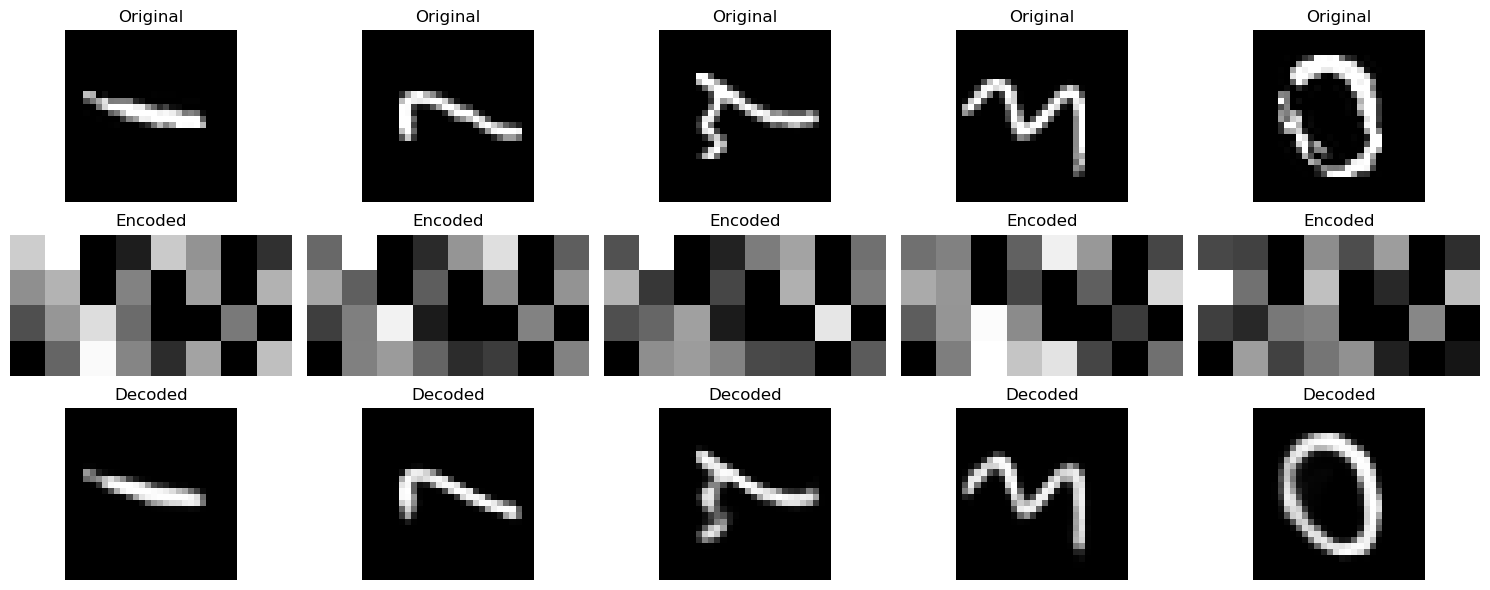

In [25]:
# Get the first 5 images
original_images = data_array[:5]

# Encode the images 
encoded_images = encoder.predict(original_images)

# Decode the images
decoded_images = autoencoder.predict(original_images)

# Check the shape of encoded images
print("Shape of encoded images:", encoded_images.shape)

# Set up the subplot structure
fig, axes = plt.subplots(3, 5, figsize=(15, 6))

# Plot original images
for i in range(5):
    axes[0, i].imshow(original_images[i].reshape(28, 28), cmap='gray')  # Assuming images are 28x28
    axes[0, i].axis('off')
    axes[0, i].set_title('Original')

# Plot encoded images
for i in range(5):
    # Reshape based on the shape of encoded_images
    axes[1, i].imshow(encoded_images[i].reshape(4, 8), cmap='gray')  # Adjust (4, 8) based on the actual shape
    axes[1, i].axis('off')
    axes[1, i].set_title('Encoded')

# Plot decoded images
for i in range(5):
    axes[2, i].imshow(decoded_images[i].reshape(28, 28), cmap='gray')
    axes[2, i].axis('off')
    axes[2, i].set_title('Decoded')

plt.tight_layout()
plt.show()


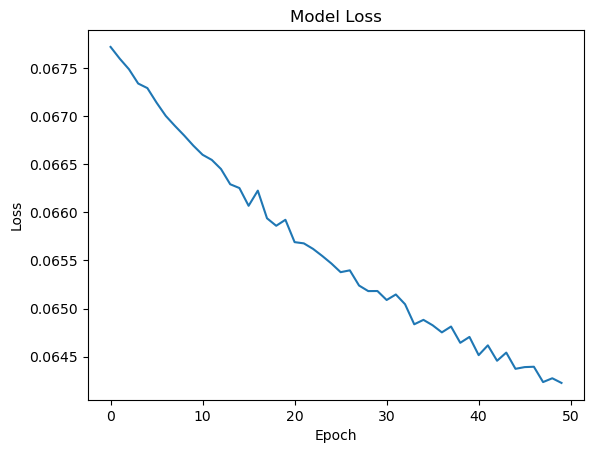

In [39]:
# Plot the loss over epochs
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [33]:
''' Amount of Data to Store a Single Image (Uncompressed) 
Each image has 784 pixels, and each pixel is represented by a floating-point number,
which takes 4 bytes (32 bits).
'''

print("784 pixels × 4bytes per pixel = 3136 bytes")
total = 784 * 4
print("Data needed to store a single image (uncompressed):", total)



784 pixels × 4bytes per pixel = 3136 bytes
Data needed to store a single image (uncompressed): 3136


In [35]:
''' Amount of Data to Store a Single Image (Encoded) 
Each image has 784 pixels, and each pixel is represented by a floating-point number,
which takes 4 bytes (32 bits).
'''

print("32 pixels × 4 bytes per pixel = 128 bytes")
total_compressed = 32 * 4
print("Data needed to store a single image (Encoded):", total_compressed)



32 pixels × 4 bytes per pixel = 128 bytes
Data needed to store a single image (Encoded): 128


In [38]:
''' Amount of Data to Store a Single Image (Encoded) 
Each image has 784 pixels, and each pixel is represented by a floating-point number,
which takes 4 bytes (32 bits).
'''

print("32 pixels × 4 bytes per pixel = 128 bytes")
memory_saved = (1- (total_compressed/total)) * 100

print("By reducing the encoding to 32 units, we achieve a ", memory_saved ,"% reduction in storage space compared to the uncompressed image size.")




32 pixels × 4 bytes per pixel = 128 bytes
By reducing the encoding to 32 units, we achieve a  95.91836734693877 % reduction in storage space compared to the uncompressed image size.


## Conclusion


By adjusting the learning rate, reducing the encoding size, and decreasing the training epochs from 100 to 50, We achieved decent image reconstructions using just 32 encoded units, saving **95.92%** of the storage space per image.

Although further compression (such as reducing the encoding to 16 units) is possible, it starts to affect the reconstruction quality. Therefore, 32 units appears to be a good trade-off between compression and image fidelity.






